# Analyze Ice Caps - Region 7

This notebook analyzes the 10 largest ice caps in regions 3, 4, 5, 6, 7, 8, 9, 10, and 17

In [1]:
import os
import os.path as op
import sys
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon
import rasterio as rio
from rasterio.plot import plotting_extent
import earthpy.plot as ep

# set working dir
HOME = op.join(op.expanduser("~"))
os.chdir(os.path.join(HOME, "git/wgms-glacier-project"))

# Set up path to load scripts
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import scripts.wgms_scripts as ws

In [2]:
region = 7

# Open region 7 glims file
region_fn = "data/glims/processed/cleaned/glims_region_" + str(region) + "_cleaned.shp"
region_7_df = gpd.read_file(region_fn)

# Open region 7 largest ice caps file
region_lg_fn = "data/glims/processed/ice-caps/largest/largest-ice-caps-region_" + str(region) + ".shp"
ten_lg_region_7_df = gpd.read_file(region_lg_fn)

In [3]:
ten_lg_region_7_df

,id,area,geometry
0,7,8402.703720,"POLYGON ((18.914782 78.469039, 18.910191 78.46..."
1,708,8077.403592,"POLYGON ((24.946811 79.36035200000001, 24.9392..."
2,8,5410.102716,"POLYGON ((13.66026 78.255189, 13.660433 78.255..."
3,431,4451.165085,"POLYGON ((18.185957 77.56537, 18.185853 77.565..."
4,706,2372.805757,"POLYGON ((19.215861 79.764661, 19.215788 79.76..."
5,215,1160.308733,"POLYGON ((23.382094 77.464433, 23.422874 77.45..."
6,638,646.149091,"POLYGON ((33.482192 80.22808499999999, 33.4878..."
7,871,511.149775,"POLYGON ((21.936172 78.491522, 21.963917 78.49..."
8,200,226.928046,"POLYGON ((22.046245 77.567789, 22.04168 77.568..."
9,762,161.182697,"POLYGON ((20.493904 79.52167, 20.497456 79.520..."


In [4]:
# Open natural earth basemap TIF file
ne_fp = 'data/natural-earth/NE1_50m_SR/NE1_50M_SR.tif'
with rio.open(ne_fp) as ne_src:
    # Convert / read the data into a numpy array:
    ne_raster = ne_src.read()
    ne_src_extent = plotting_extent(ne_src)
    bounds = ne_src.bounds

In [5]:
# Open glacier regions
glacier_regions_fp = "data/gtn-g-glacier-regions/cleaned/GTN-G_glacier_regions_201707_cleaned.shp"
glacier_regions = gpd.read_file(glacier_regions_fp)

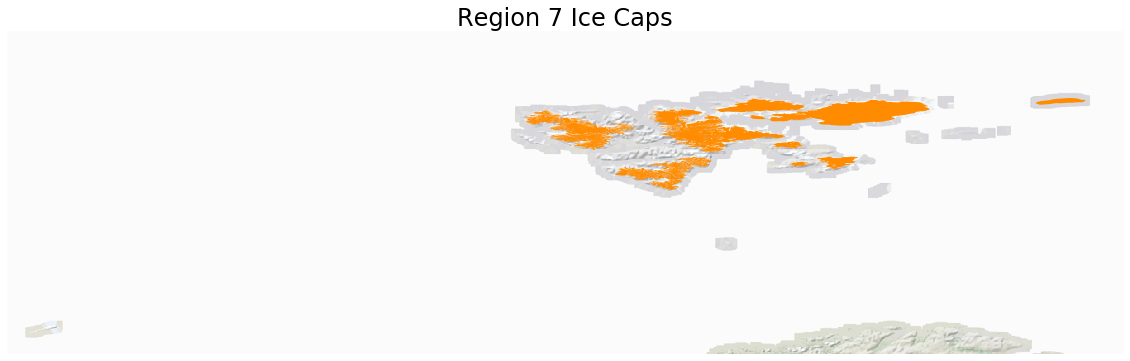

In [6]:
# Set up plot space
fig, ax = plt.subplots(figsize=(20, 20))
minx, miny, maxx, maxy = glacier_regions.loc[6:6].total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# Plot natural earth basemap for Region 1
ep.plot_rgb(ne_raster,
            rgb=[0, 1, 2],
            extent=ne_src_extent,
            ax=ax)

# Plot 1st largest and the title and legend
ten_lg_region_7_df.plot(ax=ax, color="darkorange")
ax.set_title('Region 7 Ice Caps', fontsize=24)
ax.set_axis_off()

In [7]:
# Create a clipping polygon for Agassiz Ice Cap
# Create dataframe that holds the clipping box
jan_mayan_points = Polygon([(-9.5691, 71.5205), (-7.2620, 71.5205),
                                 (-7.2620, 70.5136), (-9.5691, 70.5136), 
                                 (-9.5691, 71.5205)])
jan_mayan_gdf = gpd.GeoDataFrame([1],
                                 geometry=[jan_mayan_points],
                                 crs={'init': 'epsg:4362'})

Text(0.5, 1, 'GLIMS Region 7 with Jan Mayan outline')

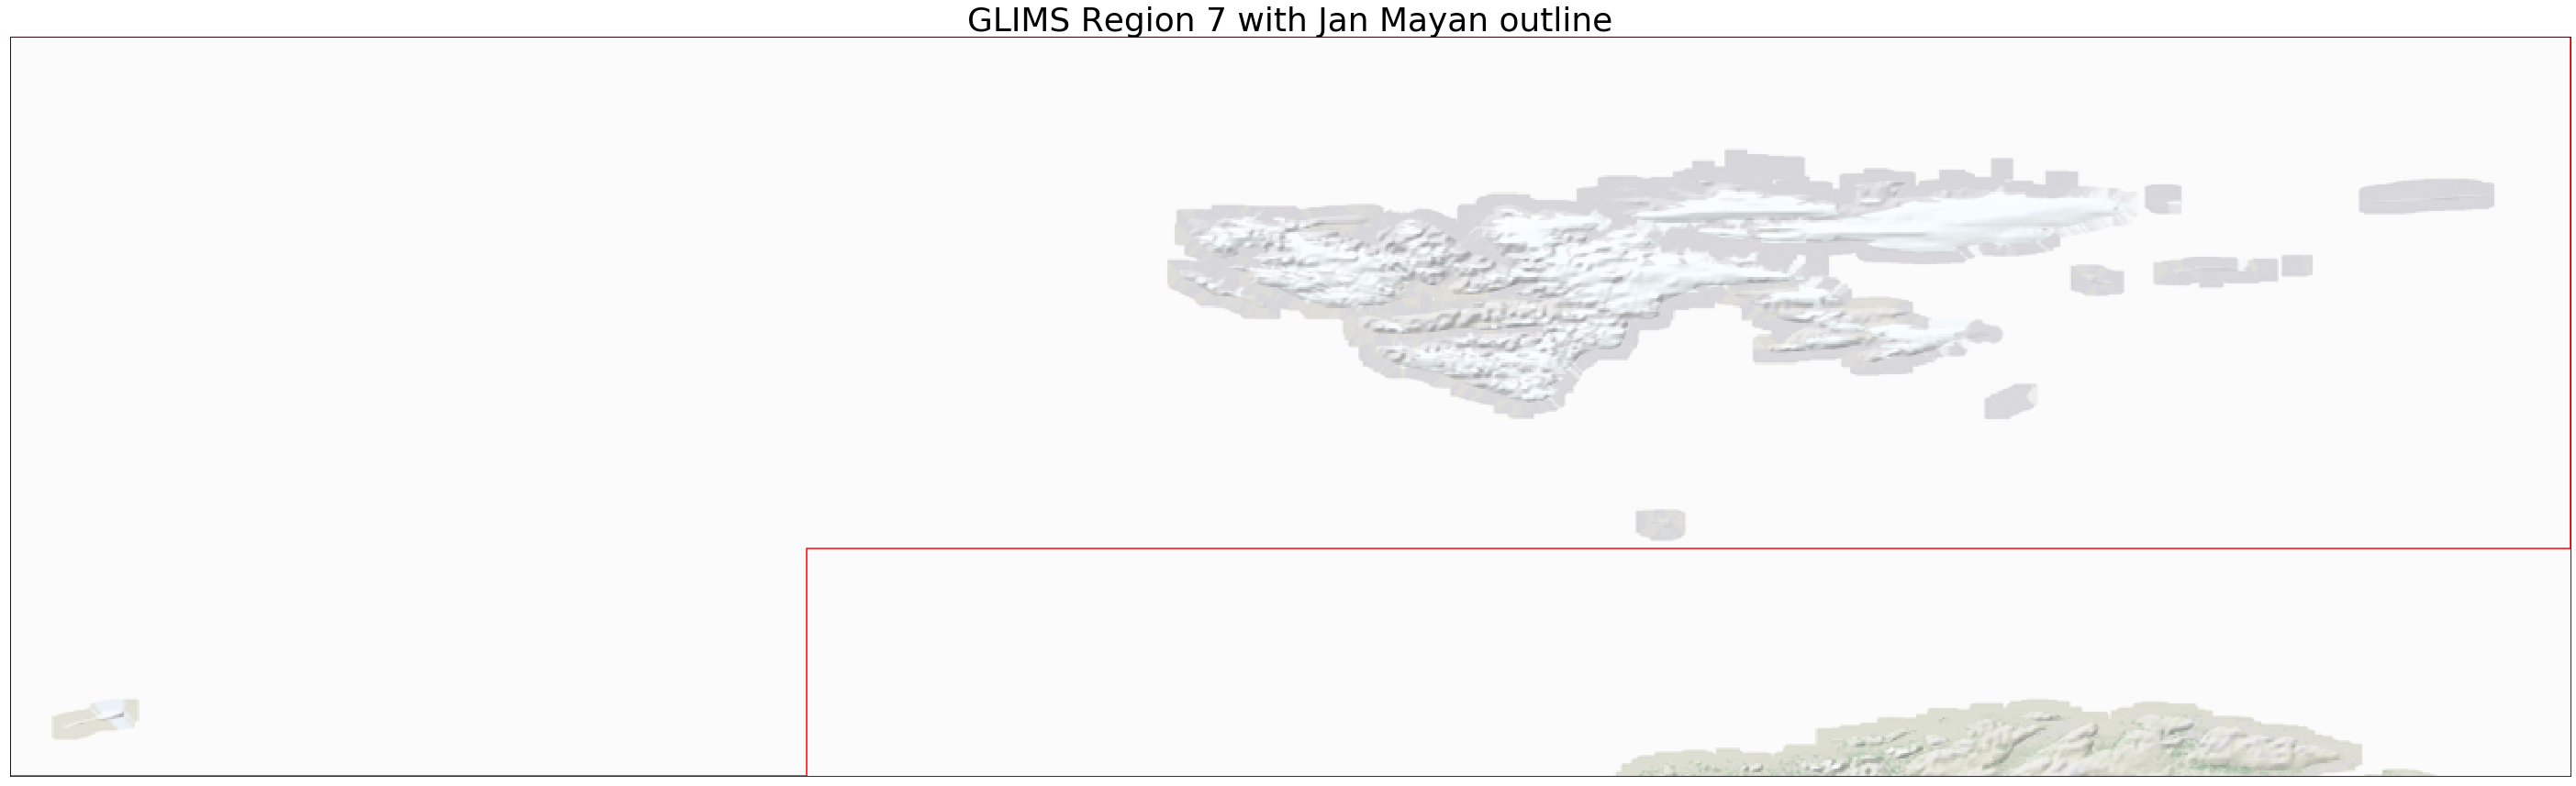

In [8]:
# Plot the jan mayan outline on top of Region 7 to make sure it is correct
fig, ax1 = plt.subplots(figsize=(50, 50))
minx, miny, maxx, maxy = glacier_regions.loc[6:6].total_bounds
ax1.set_xlim(minx, maxx)
ax1.set_ylim(miny, maxy)

# Plot natural earth basemap for Region 1
ep.plot_rgb(ne_raster,
            rgb=[0, 1, 2],
            extent=ne_src_extent,
            ax=ax1)

#jan_mayan_gdf.boundary.plot(ax=ax1, color='red')
glacier_regions.loc[6:6].boundary.plot(ax=ax1, color='red')
ax1.set_title("GLIMS Region 7 with Jan Mayan outline", fontsize=36)

In [9]:
region_7_df.crs

{'init': 'epsg:4326'}

In [10]:
# Find the GLIMS outlines that lie within the jan mayan outline
jan_mayan_pip_mask = ws.pip(region_7_df, jan_mayan_gdf)

# Pass pip_mask into data to get the ones that are in the specified region
jan_mayan_region = region_7_df.loc[jan_mayan_pip_mask]

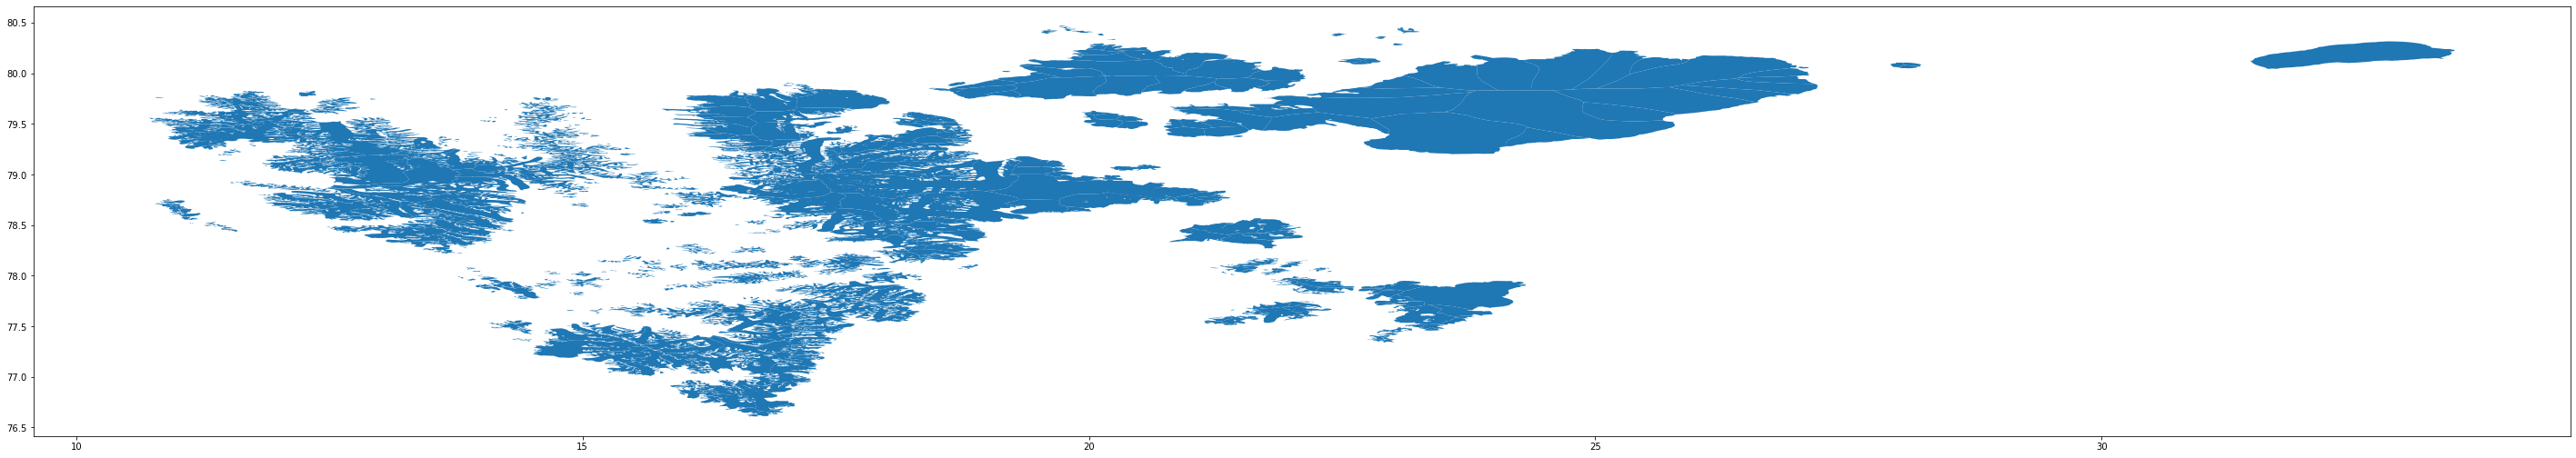

In [11]:
# Plot jan mayan area
fig, ax1 = plt.subplots(figsize=(50, 50))
#jan_mayan_region.plot(ax=ax1) # This doesn't plot anything because jan mayan isn't in the glims data
region_7_df.plot(ax=ax1)

In [12]:
# open RGI region 7 because GLIMS doesn't contain jan mayan outlines
rgi_region_fn = "data/rgi/raw/07_rgi60_Svalbard/07_rgi60_Svalbard.shp"
rgi_region_7_df = gpd.read_file(rgi_region_fn)

In [13]:
# Find the RGI outlines that lie within the jan mayan outline
jan_mayan_pip_mask = ws.pip(rgi_region_7_df, jan_mayan_gdf)

# Pass pip_mask into data to get the ones that are in the specified region
jan_mayan_region = rgi_region_7_df.loc[jan_mayan_pip_mask]

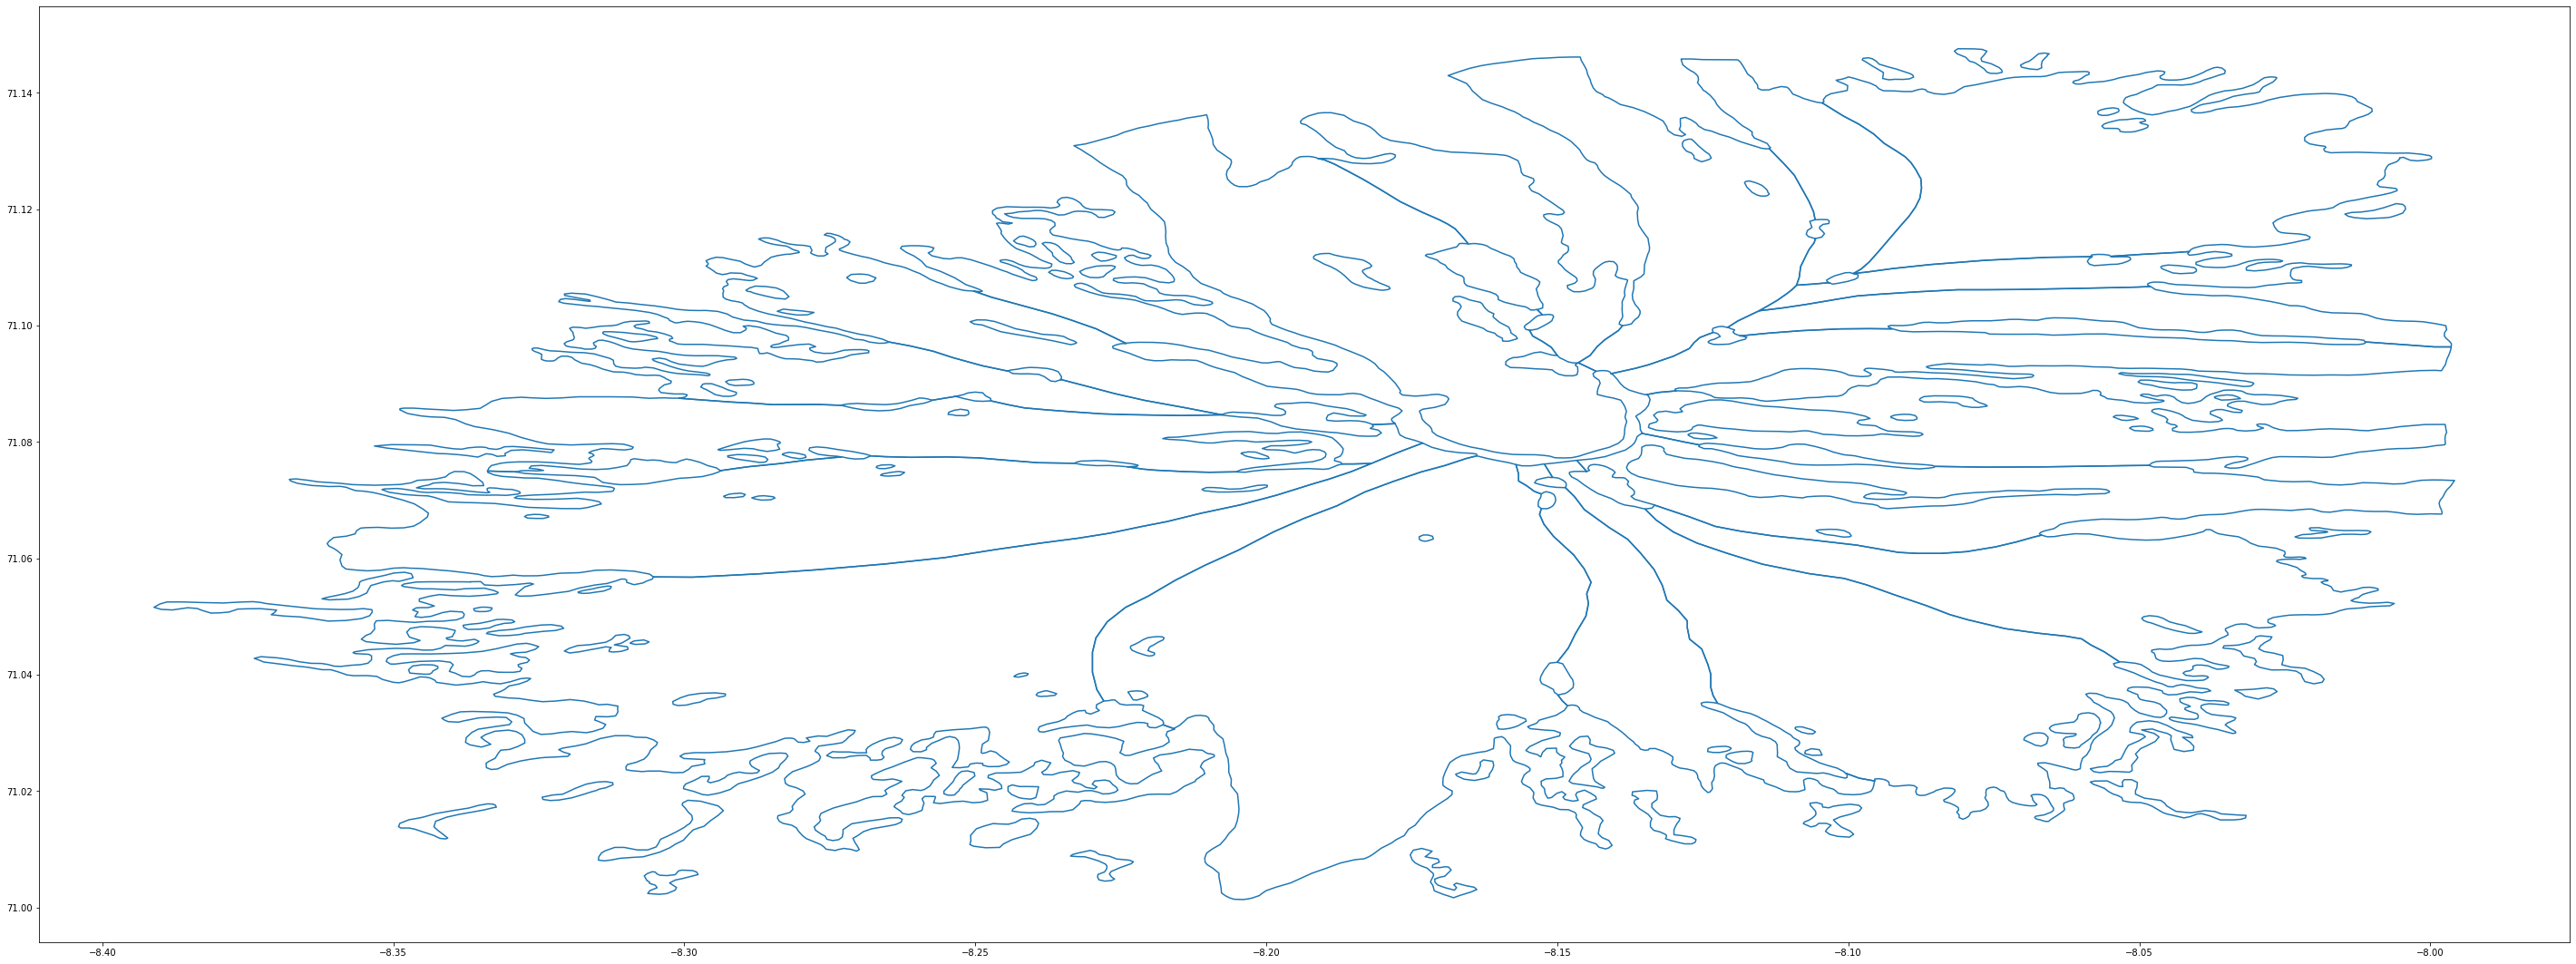

In [15]:
# Plot jan mayan area
fig, ax1 = plt.subplots(figsize=(50, 50))
jan_mayan_region.boundary.plot(ax=ax1)

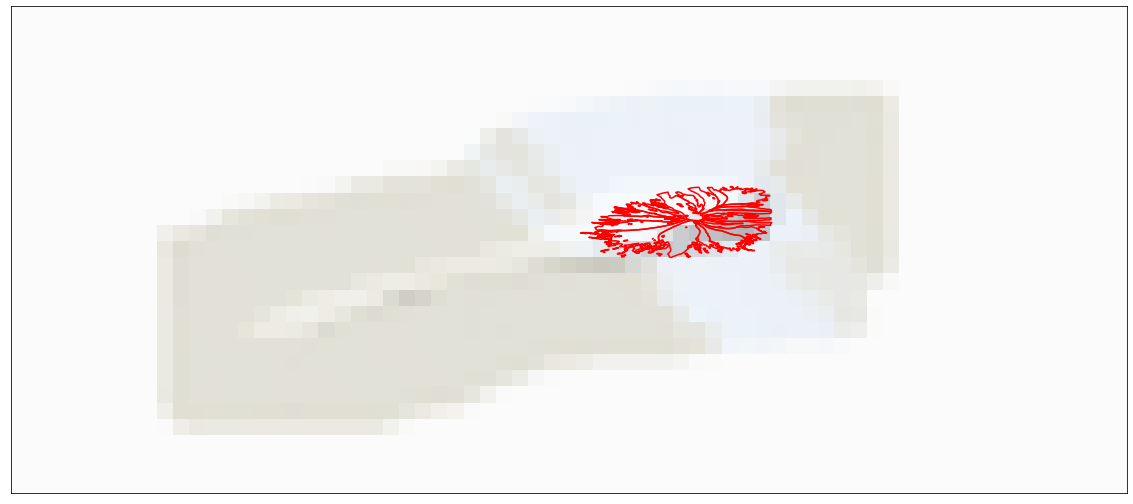

In [17]:
# Plot jan mayan glacier outlines over natural earth
# Set up plot space
fig, ax = plt.subplots(figsize=(20, 20))
minx, miny, maxx, maxy = jan_mayan_gdf.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# Plot natural earth basemap for Region 1
ep.plot_rgb(ne_raster,
            rgb=[0, 1, 2],
            extent=ne_src_extent,
            ax=ax)

jan_mayan_region.boundary.plot(ax=ax, color='red')

In [18]:
# Open RGI region 7 exploded glaicers file
rgi_exploded_fn = "data/rgi/processed/ice-caps/exploded/exploded_7.shp"
rgi_exploded_df = gpd.read_file(rgi_exploded_fn)

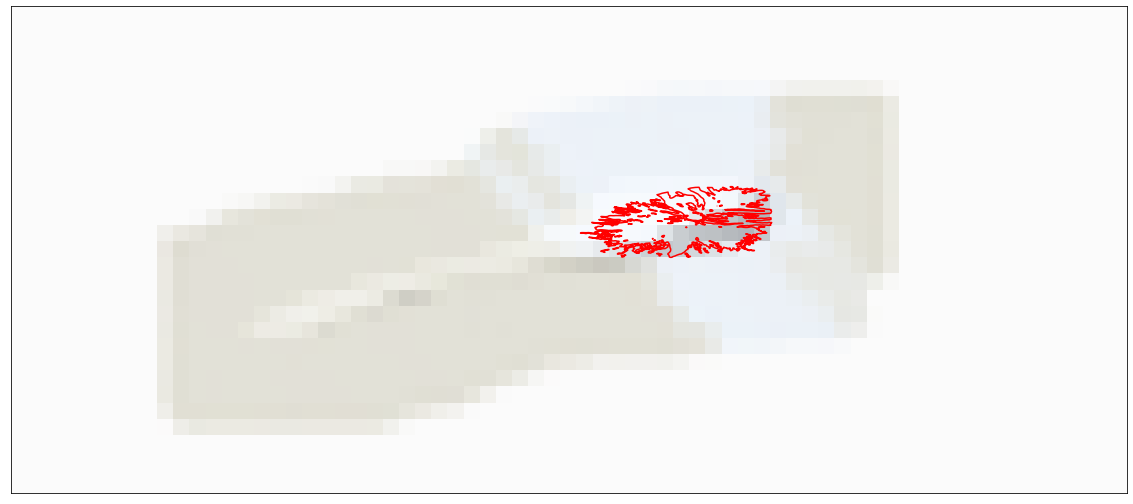

In [19]:
# plot exploded jan mayan outline over natural earth
# Set up plot space
fig, ax = plt.subplots(figsize=(20, 20))
minx, miny, maxx, maxy = jan_mayan_gdf.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# Plot natural earth basemap for Region 1
ep.plot_rgb(ne_raster,
            rgb=[0, 1, 2],
            extent=ne_src_extent,
            ax=ax)

rgi_exploded_df.boundary.plot(ax=ax, color='red')

In [20]:
# Find the exploded RGI outlines that lie within the jan mayan outline
jan_mayan_exploded_pip_mask = ws.pip(rgi_exploded_df, jan_mayan_gdf)

# Pass pip_mask into data to get the ones that are in the specified region
jan_mayan_exploded_region = rgi_exploded_df.loc[jan_mayan_exploded_pip_mask]

In [21]:
jan_mayan_exploded_region

,id,geometry
3,3,POLYGON ((-8.029386747999979 71.04128799700004...
4,4,POLYGON ((-8.371137058999977 71.05213838300006...
5,5,"POLYGON ((-8.35446462699997 71.05642203700006,..."
6,6,POLYGON ((-8.016815729999962 71.06486898400004...
7,7,POLYGON ((-8.306408274999967 71.00457663500003...
8,8,POLYGON ((-8.344879767999942 71.01551210400004...
9,9,POLYGON ((-8.170052149999947 71.00241806900004...
10,10,POLYGON ((-8.227854735999927 71.00755185900005...
11,11,"POLYGON ((-8.04041798999998 71.03339300500005,..."
12,12,POLYGON ((-8.045878538999943 71.01626489100005...


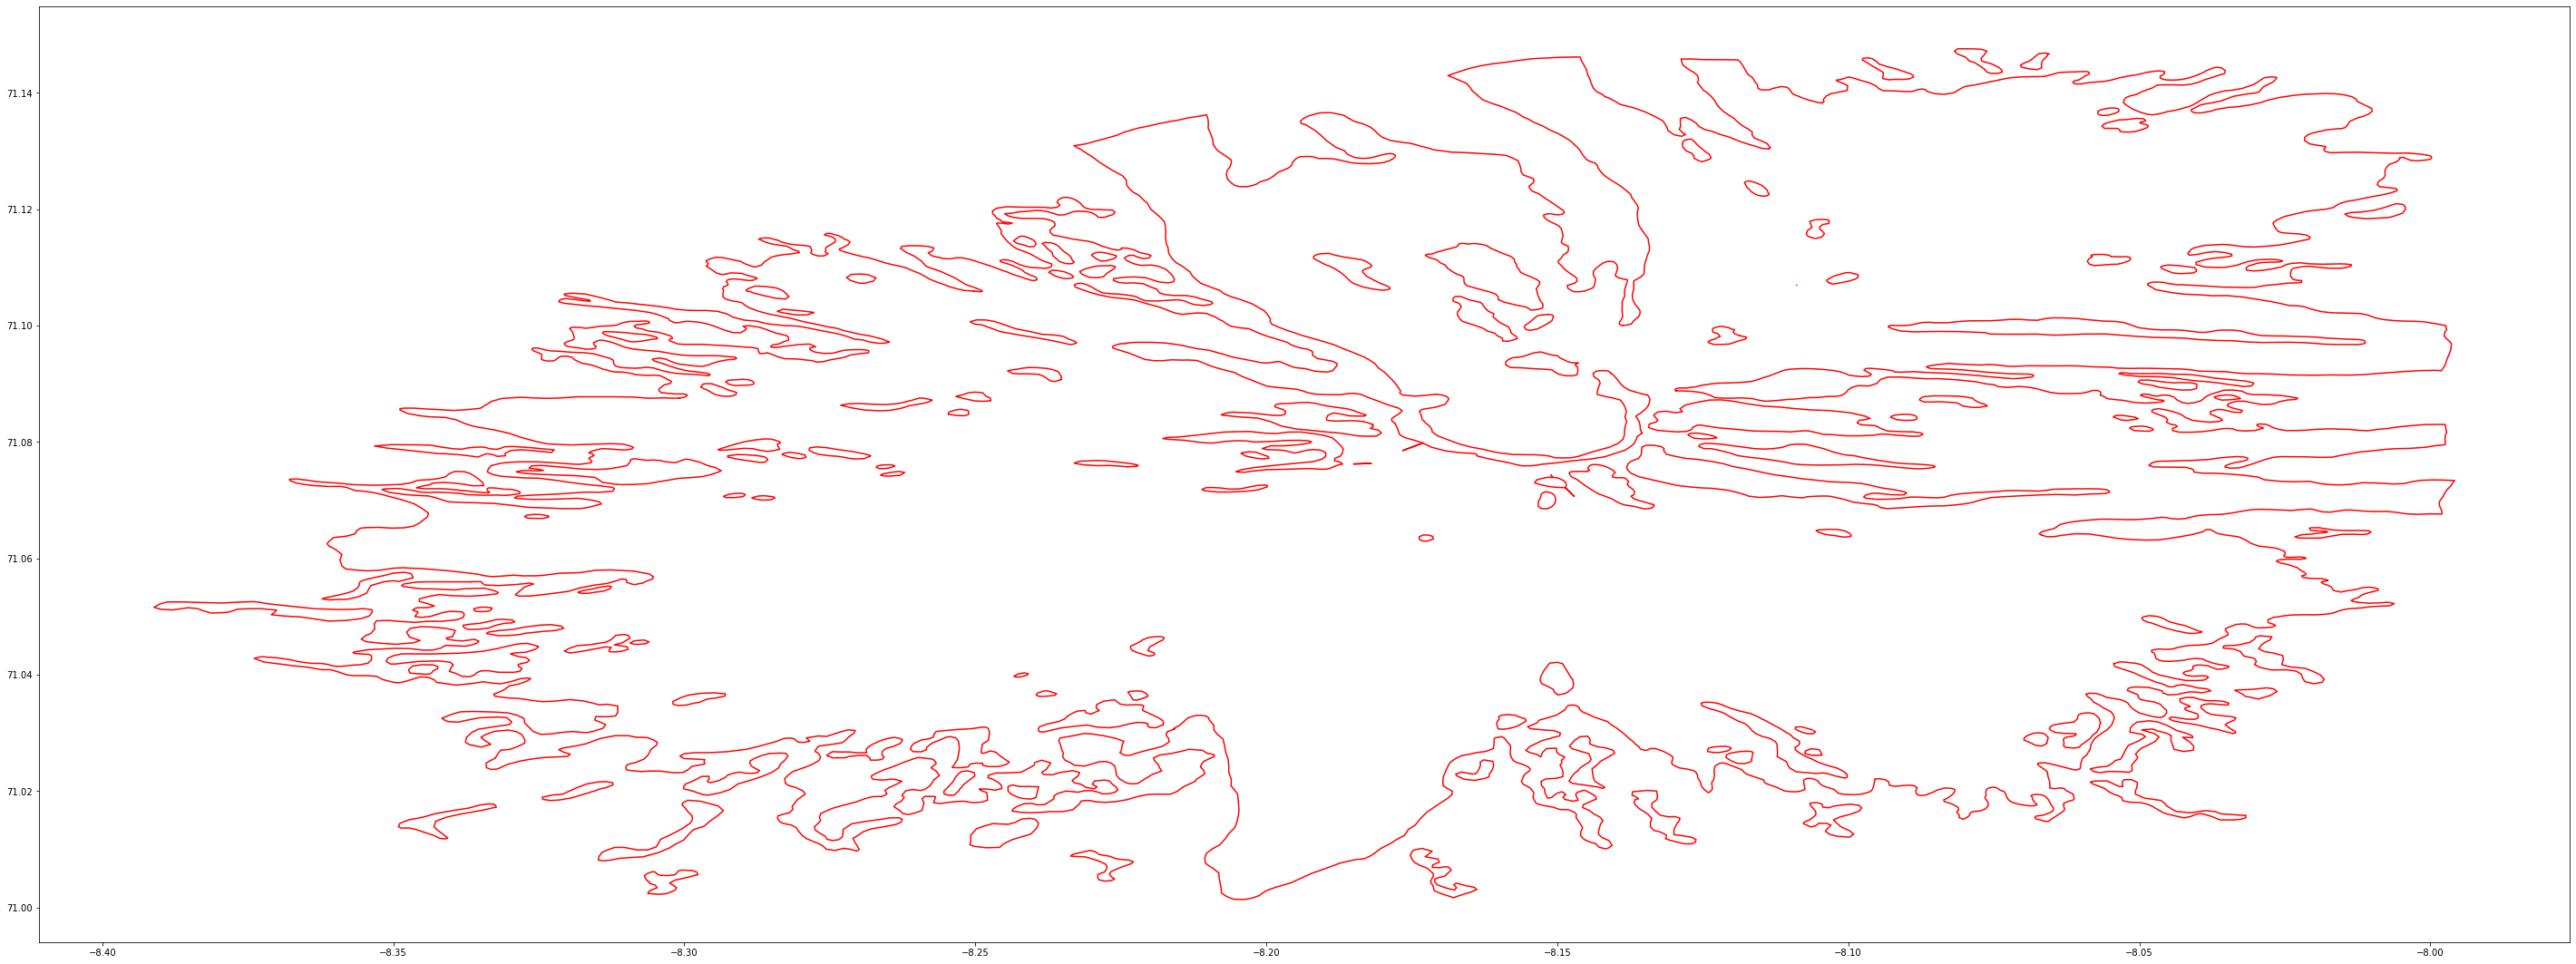

In [62]:
fig, ax = plt.subplots(figsize=(50,50))
jan_mayan_exploded_region.boundary.plot(ax=ax, color='red')

In [24]:
# Determine the area of all the jan mayan exploded polygons
jan_mayan_areas = jan_mayan_exploded_region['geometry'].to_crs({'init': 'epsg:3058'}).area/10**6

In [39]:
jan_mayan_areas.iloc[27]

118.79218934735314

In [63]:
jan_mayan_exploded_region.loc[27:27]

,id,geometry
27,27,POLYGON ((-8.007640175999938 71.11852044700004...


In [64]:
# Add the areas to the dataframe
jan_mayan_exploded_region = jan_mayan_exploded_region.assign(area=jan_mayan_areas)

In [65]:
jan_mayan_exploded_region

,id,geometry,area
3,3,POLYGON ((-8.029386747999979 71.04128799700004...,0.139312
4,4,POLYGON ((-8.371137058999977 71.05213838300006...,0.222576
5,5,"POLYGON ((-8.35446462699997 71.05642203700006,...",0.074170
6,6,POLYGON ((-8.016815729999962 71.06486898400004...,0.042566
7,7,POLYGON ((-8.306408274999967 71.00457663500003...,0.073589
8,8,POLYGON ((-8.344879767999942 71.01551210400004...,0.098226
9,9,POLYGON ((-8.170052149999947 71.00241806900004...,0.103210
10,10,POLYGON ((-8.227854735999927 71.00755185900005...,0.066920
11,11,"POLYGON ((-8.04041798999998 71.03339300500005,...",0.113576
12,12,POLYGON ((-8.045878538999943 71.01626489100005...,0.138805


In [68]:
# Select the largest jan mayan ice caps
jan_mayan_largest_df = jan_mayan_exploded_region[['id', 'area', 'geometry']].nlargest(1, 'area')

In [69]:
jan_mayan_largest_df

,id,area,geometry
33,33,118.792189,POLYGON ((-8.148241688999974 71.03465712100007...


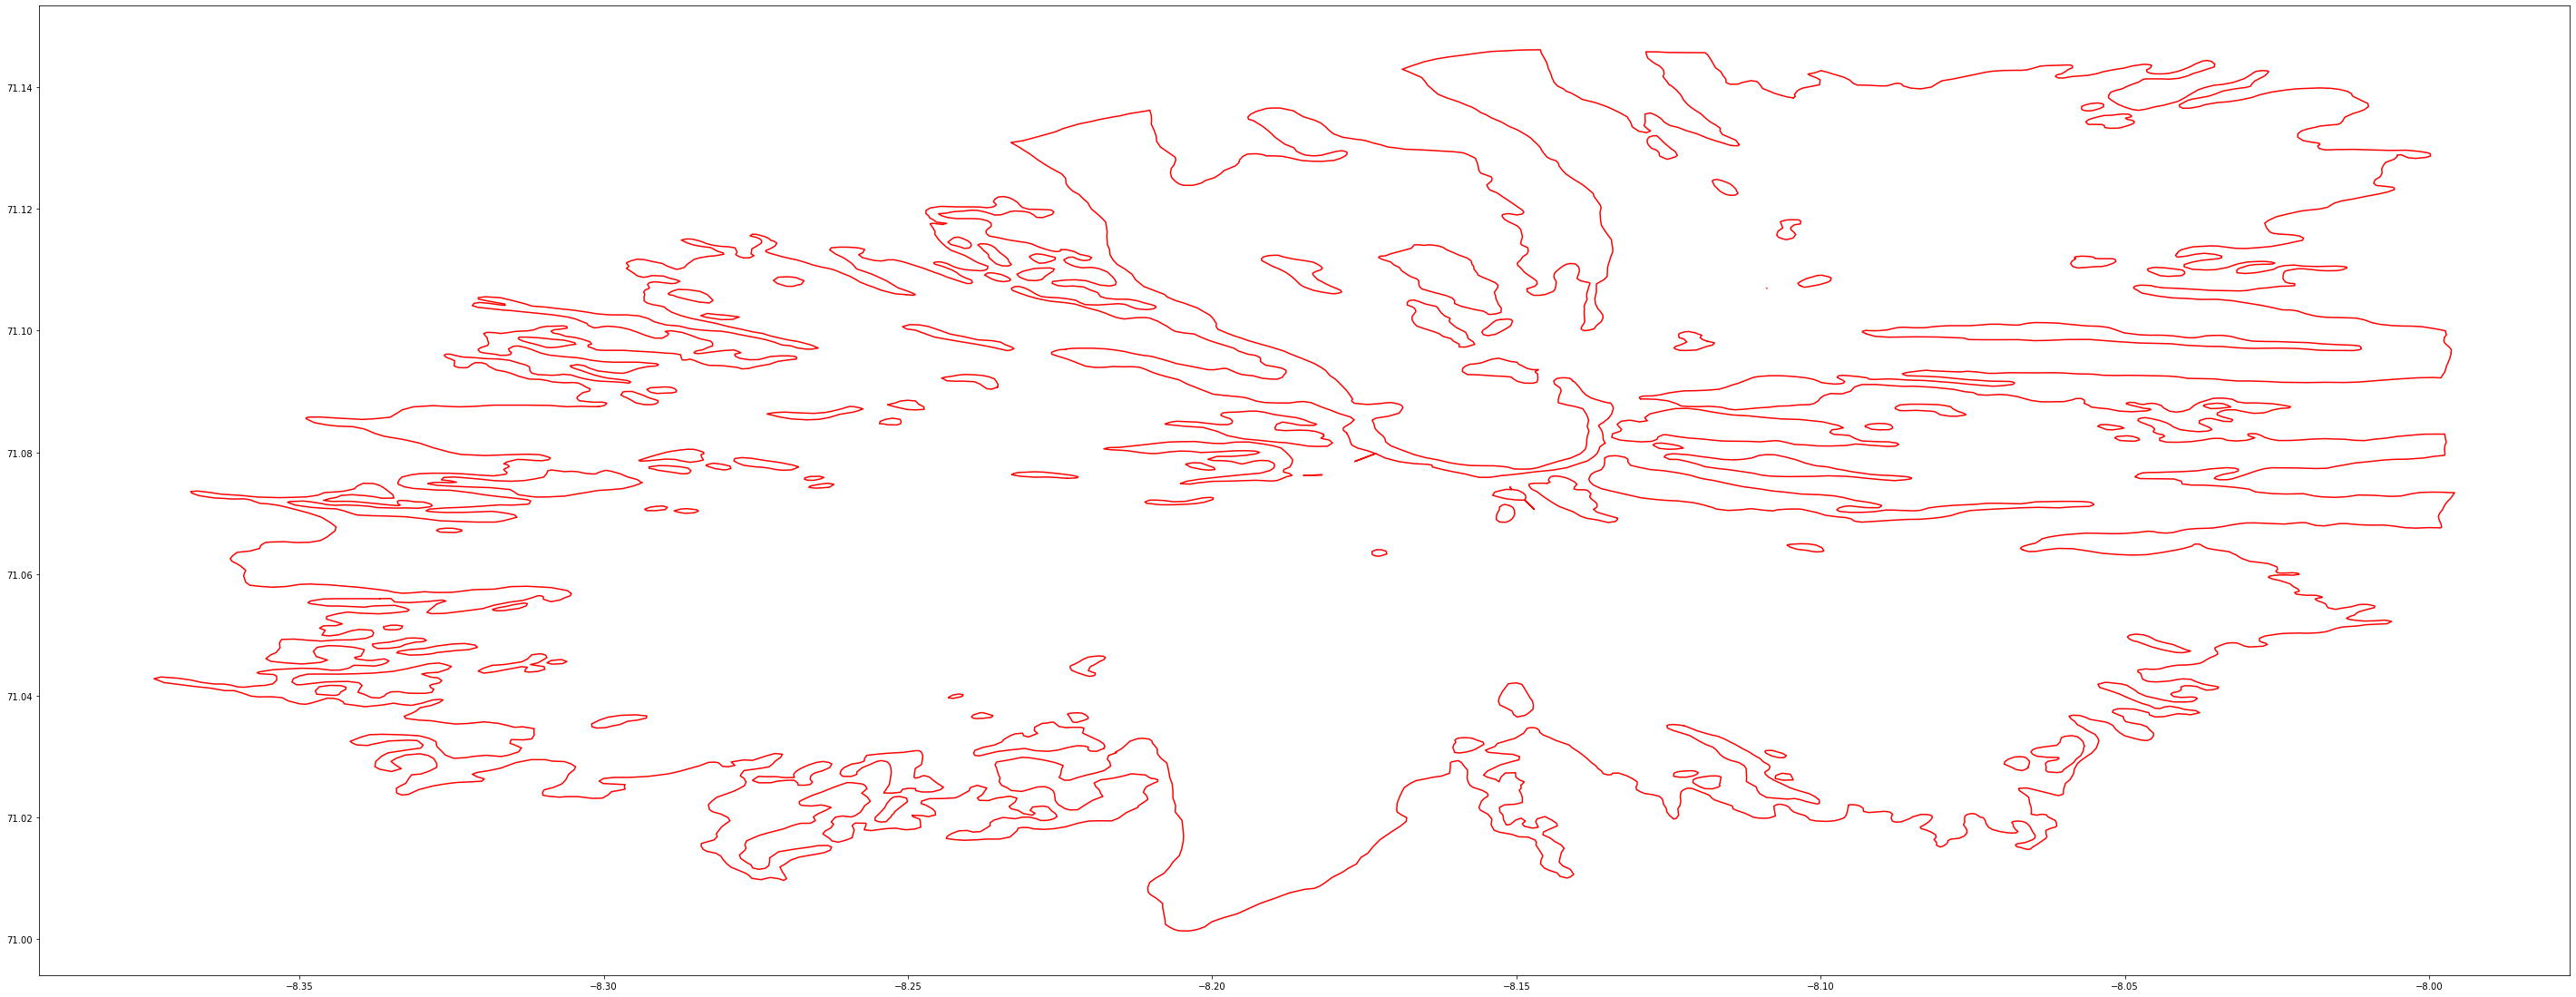

In [70]:
fig, ax = plt.subplots(figsize=(50,50))
jan_mayan_largest_df.boundary.plot(ax=ax, color='red')

In [71]:
# Open GLIMS region 7 exploded
glims_region_7_exp_fn = "data/glims/processed/ice-caps/exploded/exploded_7.shp"
glims_region_7_exp_df = gpd.read_file(glims_region_7_exp_fn)

In [72]:
glims_region_7_exp_df

,id,geometry
0,0,"POLYGON ((14.393943 77.45912800000001, 14.3939..."
1,1,"POLYGON ((16.29728946757721 77.92447097866305,..."
2,2,"POLYGON ((16.639478 77.92756199999999, 16.6400..."
3,3,"POLYGON ((16.099997 78.595101, 16.098397 78.59..."
4,4,"POLYGON ((11.065599 78.59809799999999, 11.0655..."
...,...,...
902,902,"POLYGON ((12.799034 78.55245499999999, 12.8022..."
903,903,"POLYGON ((17.231712 78.547453, 17.228457 78.54..."
904,904,"POLYGON ((12.521335 78.550381, 12.518421 78.55..."
905,905,"POLYGON ((12.752563 78.554061, 12.745961 78.55..."


In [73]:
# Determine the area of all the polygons
glims_region_7_exp_areas = glims_region_7_exp_df['geometry'].to_crs({'init': 'epsg:3049'}).area/10**6
    
# Add the areas to the dataframe
glims_region_7_exp_df = glims_region_7_exp_df.assign(area=glims_region_7_exp_areas)
    
# Determine the 20 largest ice caps
twenty_largest_df = glims_region_7_exp_df[['id', 'area', 'geometry']].nlargest(20, 'area')

In [74]:
twenty_largest_df

,id,area,geometry
7,7,8402.703720,"POLYGON ((18.914782 78.469039, 18.910191 78.46..."
708,708,8077.403592,"POLYGON ((24.946811 79.36035200000001, 24.9392..."
8,8,5410.102716,"POLYGON ((13.66026 78.255189, 13.660433 78.255..."
431,431,4451.165085,"POLYGON ((18.185957 77.56537, 18.185853 77.565..."
706,706,2372.805757,"POLYGON ((19.215861 79.764661, 19.215788 79.76..."
215,215,1160.308733,"POLYGON ((23.382094 77.464433, 23.422874 77.45..."
638,638,646.149091,"POLYGON ((33.482192 80.22808499999999, 33.4878..."
871,871,511.149775,"POLYGON ((21.936172 78.491522, 21.963917 78.49..."
200,200,226.928046,"POLYGON ((22.046245 77.567789, 22.04168 77.568..."
762,762,161.182697,"POLYGON ((20.493904 79.52167, 20.497456 79.520..."
